In [35]:
import os
import pickle

import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from metrics.visualization import visualization

%matplotlib inline

## PCA and t-SNE visualization

In [36]:
path = "output/test"

with open(f"{path}/test_data.pickle", "rb") as fb:
    ori_data = pickle.load(fb)
    # ori_data = ori_data.reshape(ori_data.shape[0]*ori_data.shape[1], ori_data.shape[2])
with open(f"{path}/fake_data.pickle", "rb") as fb:
    new_data = pickle.load(fb)
    # new_data = new_data.reshape(new_data.shape[0]*new_data.shape[1], new_data.shape[2])

print(ori_data.shape, new_data.shape)

(50, 2, 1) (50, 2, 1)


In [37]:
print("Original data", ori_data)
print("New data", new_data)

Original data [[[ 5.00000000e-01]
  [-1.00000000e+00]]

 [[ 4.68604740e-01]
  [-1.00000000e+00]]

 [[ 4.37333383e-01]
  [-1.00000000e+00]]

 [[ 4.06309343e-01]
  [-1.00000000e+00]]

 [[ 3.75655056e-01]
  [-1.00000000e+00]]

 [[ 3.45491503e-01]
  [-1.00000000e+00]]

 [[ 3.15937724e-01]
  [-1.00000000e+00]]

 [[ 2.87110354e-01]
  [-1.00000000e+00]]

 [[ 2.59123163e-01]
  [-1.00000000e+00]]

 [[ 2.32086603e-01]
  [-1.00000000e+00]]

 [[ 2.06107374e-01]
  [-1.00000000e+00]]

 [[ 1.81288005e-01]
  [-1.00000000e+00]]

 [[ 1.57726447e-01]
  [-1.00000000e+00]]

 [[ 1.35515686e-01]
  [-1.00000000e+00]]

 [[ 1.14743379e-01]
  [-1.00000000e+00]]

 [[ 9.54915028e-02]
  [-1.00000000e+00]]

 [[ 7.78360372e-02]
  [-1.00000000e+00]]

 [[ 6.18466600e-02]
  [-1.00000000e+00]]

 [[ 4.75864738e-02]
  [-1.00000000e+00]]

 [[ 3.51117571e-02]
  [-1.00000000e+00]]

 [[ 2.44717419e-02]
  [-1.00000000e+00]]

 [[ 1.57084194e-02]
  [-1.00000000e+00]]

 [[ 8.85637464e-03]
  [-1.00000000e+00]]

 [[ 3.94264934e-03]


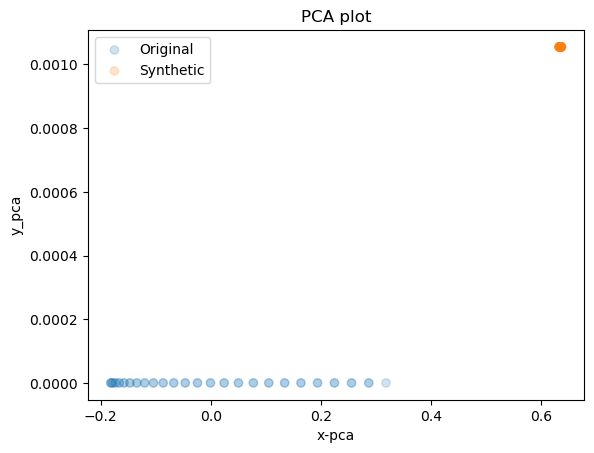

In [38]:
visualization(ori_data, new_data, 'pca')

[t-SNE] Computing 99 nearest neighbors...
[t-SNE] Indexed 100 samples in 0.001s...
[t-SNE] Computed neighbors for 100 samples in 0.286s...
[t-SNE] Computed conditional probabilities for sample 100 / 100
[t-SNE] Mean sigma: 0.002431
[t-SNE] KL divergence after 250 iterations with early exaggeration: 45.523895
[t-SNE] KL divergence after 300 iterations: 0.036905


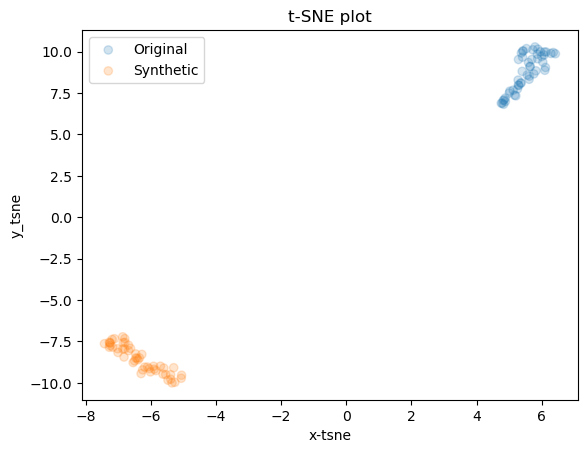

In [39]:
visualization(ori_data, new_data, 'tsne')

(50, 2, 1) (50, 2, 1)


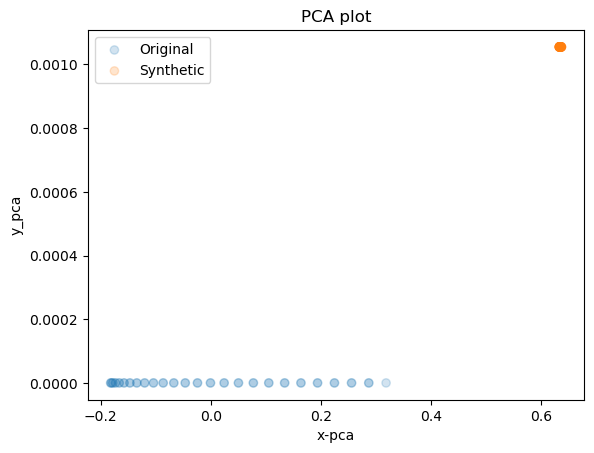

[t-SNE] Computing 99 nearest neighbors...
[t-SNE] Indexed 100 samples in 0.000s...
[t-SNE] Computed neighbors for 100 samples in 0.008s...
[t-SNE] Computed conditional probabilities for sample 100 / 100
[t-SNE] Mean sigma: 0.002431
[t-SNE] KL divergence after 250 iterations with early exaggeration: 46.337440
[t-SNE] KL divergence after 300 iterations: 0.043069


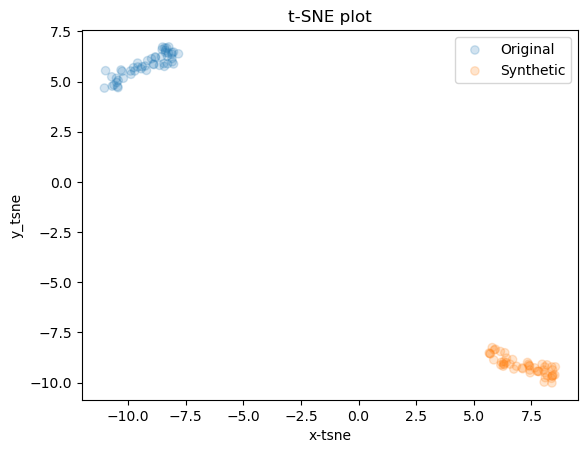

In [40]:
path = "output/test"

with open(f"{path}/test_data.pickle", "rb") as fb:
    ori_data = pickle.load(fb)
    # ori_data = ori_data.reshape(ori_data.shape[0]*ori_data.shape[1], ori_data.shape[2])
with open(f"{path}/fake_data.pickle", "rb") as fb:
    new_data = pickle.load(fb)
    # new_data = new_data.reshape(new_data.shape[0]*new_data.shape[1], new_data.shape[2])

print(ori_data.shape, new_data.shape)

visualization(ori_data, new_data, 'pca')
visualization(ori_data, new_data, 'tsne')

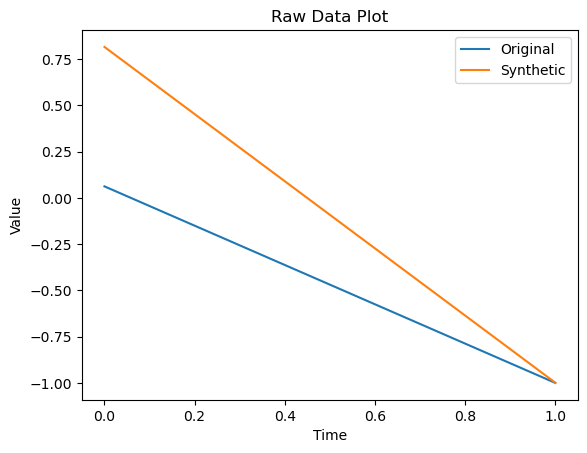

In [41]:
import random

# Select a random instance index
idx = random.randint(0, len(ori_data) - 1)
plt.plot(ori_data[idx,:,0], label='Original')  # Plotting the first feature of the selected instance
plt.plot(new_data[idx,:,0], label='Synthetic')  # Plotting the first feature of the selected instance from generated data

plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Raw Data Plot')
plt.legend()
plt.show()

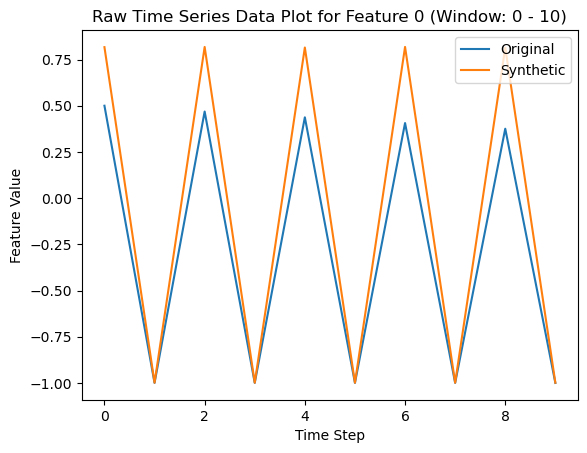

In [42]:
# Select a random feature index (assuming 0-based indexing)
feature_index = 0

# Define the start and end indices of the window
window_start = 0
window_end = 10  # Adjust this value to define the end of the window

# Flatten the arrays to plot the time series data for the selected feature within the window
ori_data_flattened = ori_data[:, window_start:window_end, feature_index].flatten()
new_data_flattened = new_data[:, window_start:window_end, feature_index].flatten()

# Generate corresponding time step indices for the window
time_steps = np.arange(window_start, window_end)

# Plot the time series data within the window with corresponding time steps
plt.plot(time_steps, ori_data_flattened[:window_end - window_start], label='Original')
plt.plot(time_steps, new_data_flattened[:window_end - window_start], label='Synthetic')
plt.xlabel('Time Step')
plt.ylabel('Feature Value')
plt.title('Raw Time Series Data Plot for Feature {} (Window: {} - {})'.format(feature_index, window_start, window_end))
plt.legend()
plt.show()


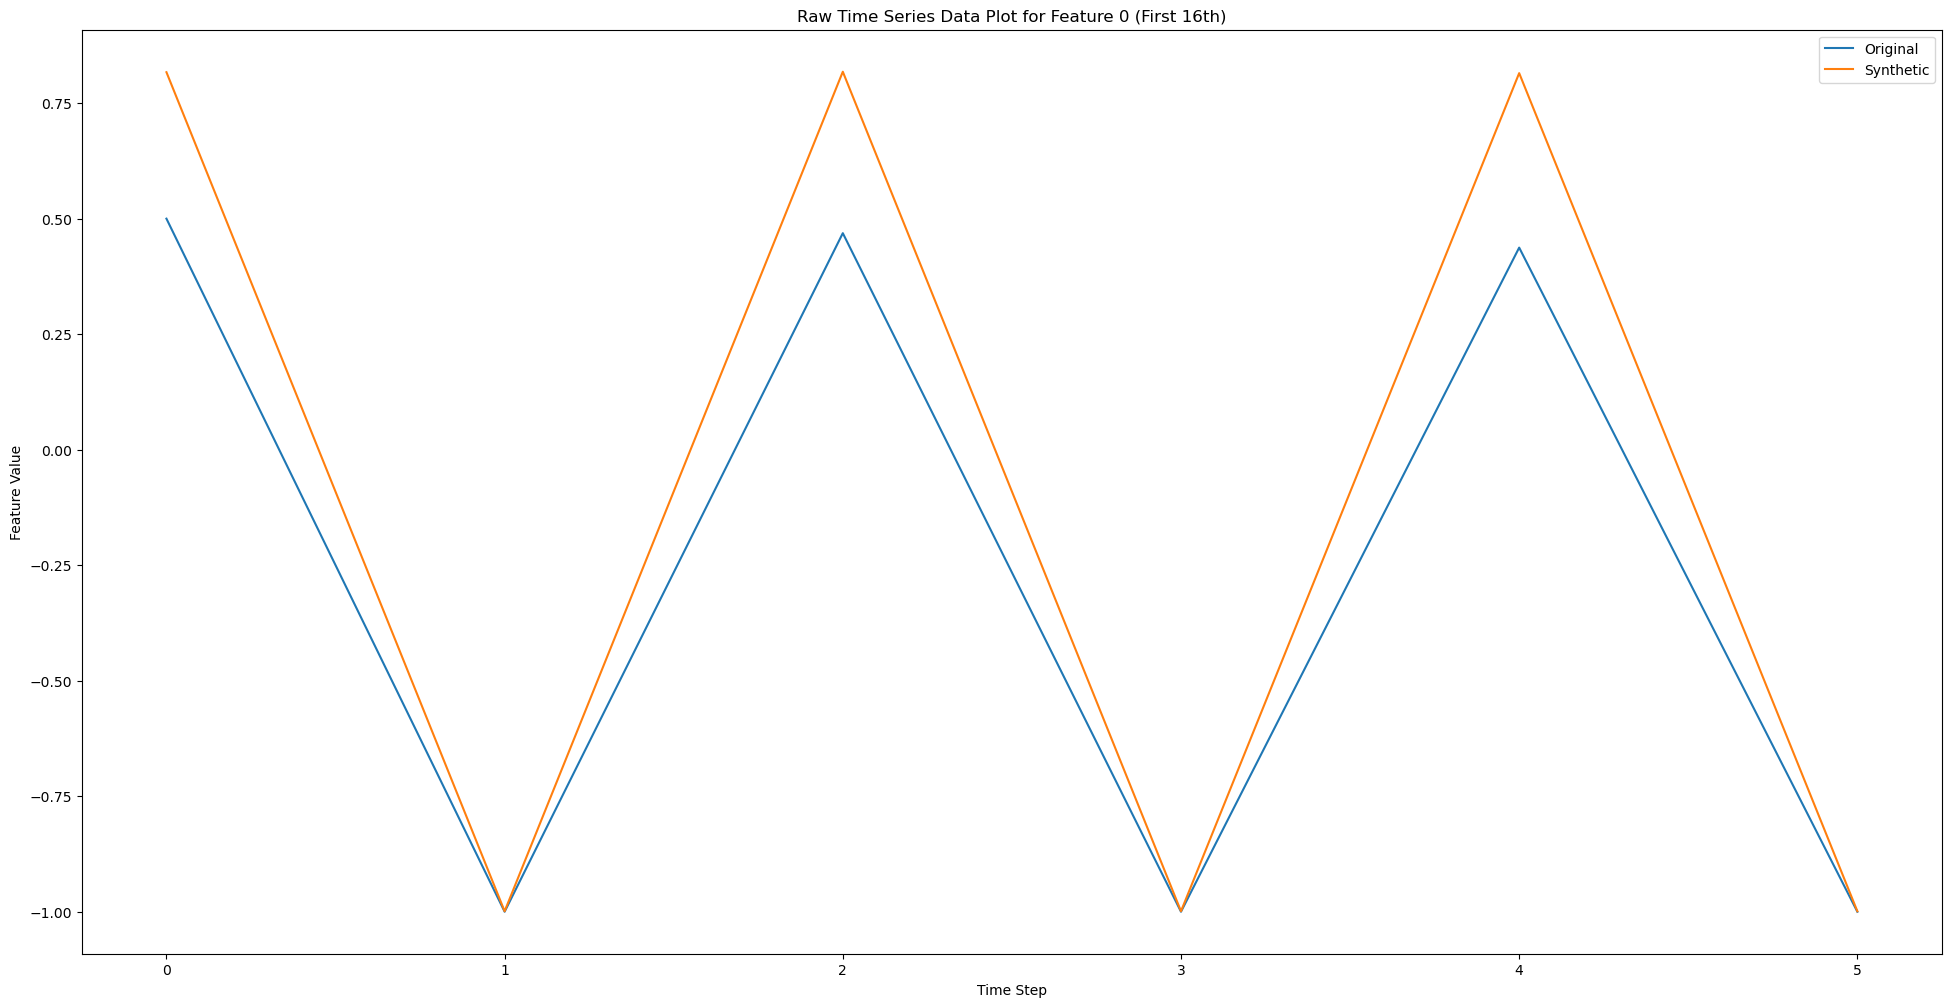

In [43]:
# Select a random feature index (assuming 0-based indexing)
feature_index = 0

# Flatten the arrays to plot the full time series data for the selected feature
ori_data_flattened = ori_data[:,:,feature_index].flatten()
new_data_flattened = new_data[:,:,feature_index].flatten()

# Generate corresponding time step indices
time_steps = np.arange(len(ori_data_flattened))

# Set the figure size
plt.figure(figsize=(24, 12))  # Adjust width and height as needed

# Determine the length of the time series data
total_time_steps = len(ori_data_flattened)

# Calculate the range for the quarter of the data
quarter_range = total_time_steps // 16

# Plot only the first quarter of the data
plt.plot(time_steps[:quarter_range], ori_data_flattened[:quarter_range], label='Original')
plt.plot(time_steps[:quarter_range], new_data_flattened[:quarter_range], label='Synthetic')
plt.xlabel('Time Step')
plt.ylabel('Feature Value')
plt.title('Raw Time Series Data Plot for Feature {} (First 16th)'.format(feature_index))
plt.legend()
plt.show()

1600


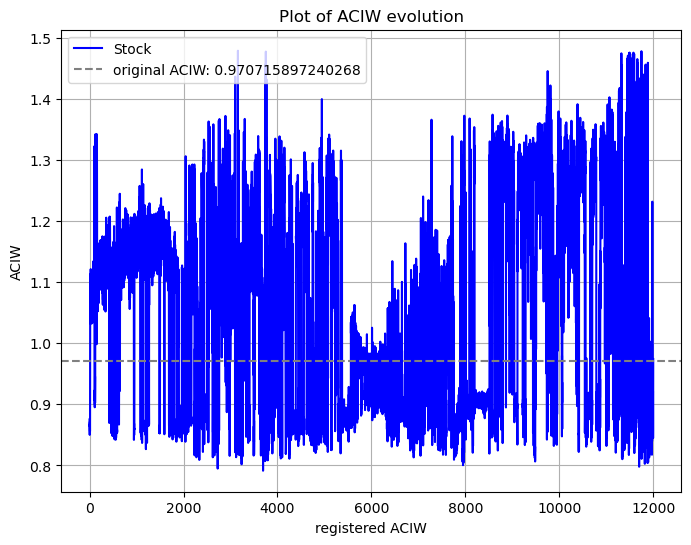

In [32]:
import pickle
import matplotlib.pyplot as plt

path = "output/test"

# Load the list of values from the first pickle file
#with open(f"{path}/sinfunc/SIN_ACIW_PT50_A1000_ARIMA.pickle", 'rb') as f:
#    values_list = pickle.load(f)

with open(f"{path}/sinfunc/Sin_ACIW_PT10_A1_ARIMA_new.pickle", 'rb') as f:
    values_list3 = pickle.load(f)


# Check if the loaded data is a list or a single value
if not isinstance(values_list4, list):
    values_list4 = [values_list4]  # Convert to list if it's a single value

print(len(values_list5))

# Load the single value from the second pickle file
with open(f"{path}/sinfunc/Sin_ARIMA_ACIW_O_new.pickle", 'rb') as f:
    single_value = pickle.load(f)

# Plot the values
plt.figure(figsize=(8, 6))  # Set the figure size (optional)

plt.plot(values_list3, linestyle='-', color='b', label='Stock')  # Plot the values
plt.axhline(y=single_value, color='gray', linestyle='--', label=f'original ACIW: {single_value}')  # Add horizontal line

plt.title('Plot of ACIW evolution')  # Set plot title
plt.xlabel('registered ACIW')  # Set x-axis label (optional)
plt.ylabel('ACIW')  # Set y-axis label (optional)
plt.grid(True)  # Show grid (optional)
plt.legend()  # Show legend

plt.show()  # Display the plot

6000
7


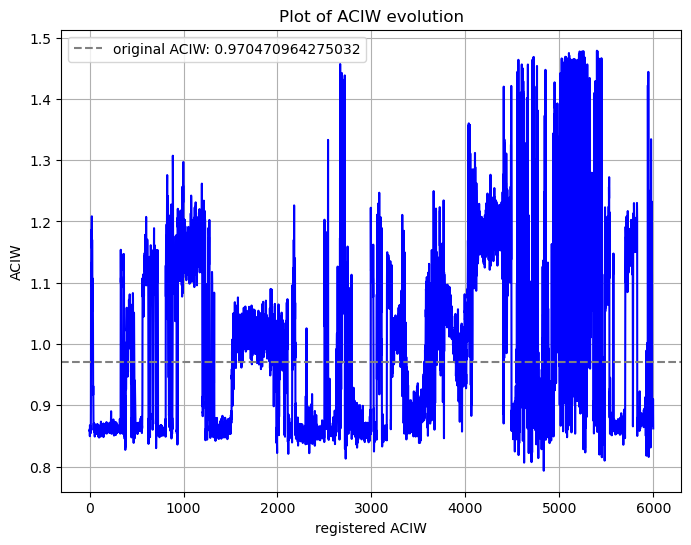

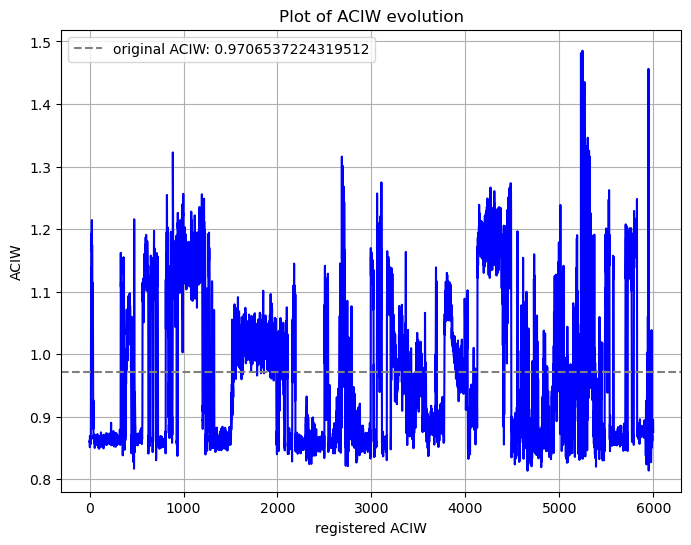

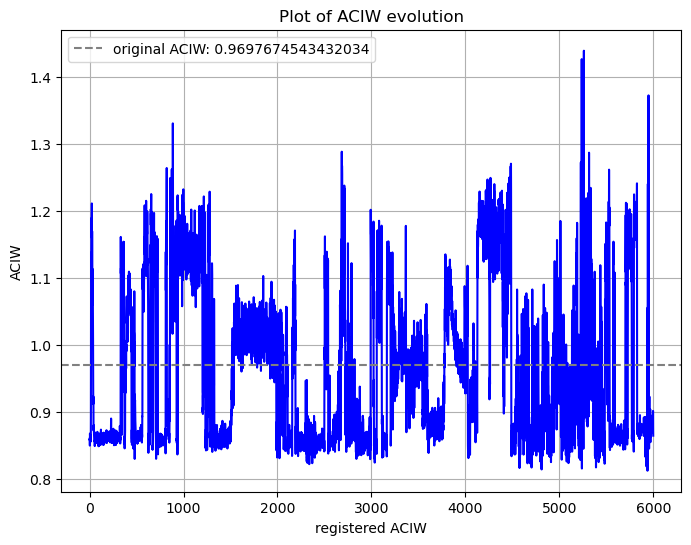

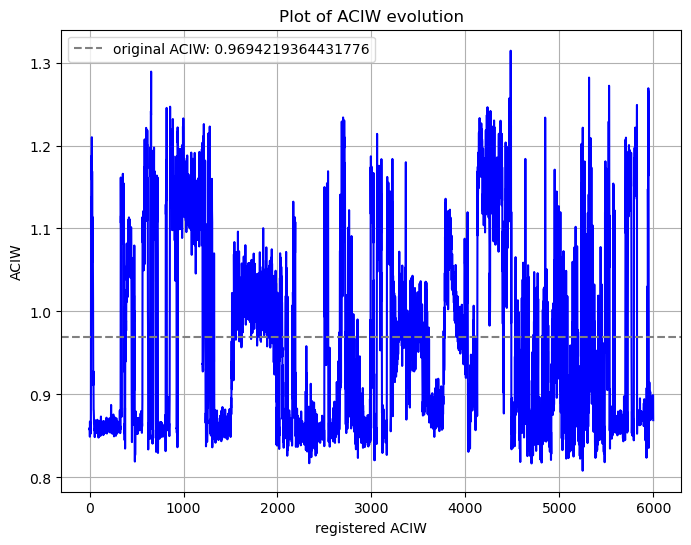

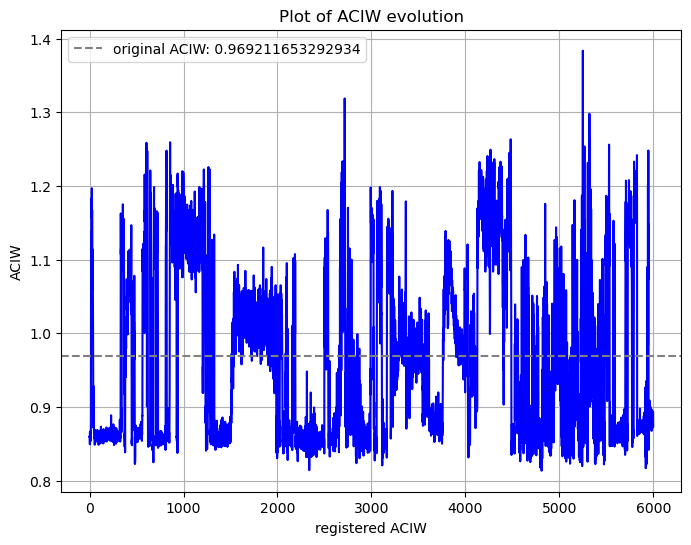

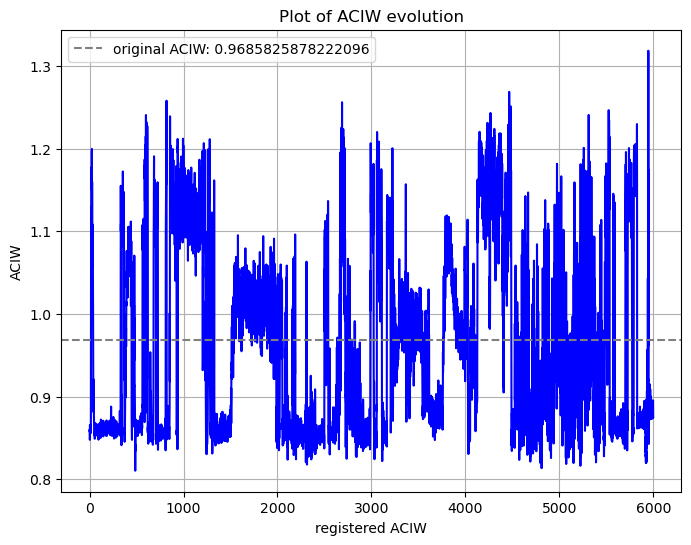

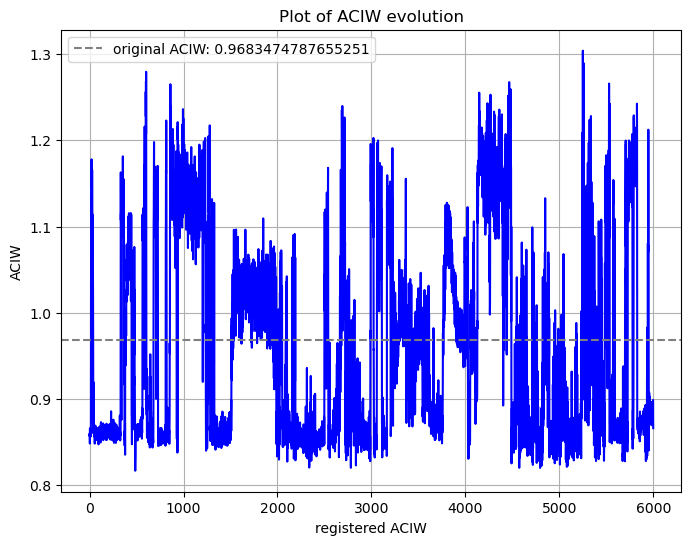

In [16]:
import pickle
import matplotlib.pyplot as plt

path = "output/test"

# Load the list of values from the first pickle file
#with open(f"{path}/sinfunc/SIN_ACIW_PT50_A1000_ARIMA.pickle", 'rb') as f:
#    values_list = pickle.load(f)


with open(f"{path}/stock/new/Stock_ACIW_lst_PT10_A1_ARIMA_1.pickle", 'rb') as f:
    values_list3 = pickle.load(f)


# Check if the loaded data is a list or a single value
if not isinstance(values_list3, list):
    values_list3 = [values_list3]  # Convert to list if it's a single value

print(len(values_list3))

print(len(values_list3[0]))

# Load the single value from the second pickle file
with open(f"{path}/stock/new/Stock_ARIMA_ACIW_O_lst_1.pickle", 'rb') as f:
    single_value = pickle.load(f)

for i in range(len(values_list3[0])):
    # Plot the values
    plt.figure(figsize=(8, 6))  # Set the figure size (optional)

    plt.plot([entry[i] for entry in values_list3], linestyle='-', color='b')  # Plot the values
    plt.axhline(y=single_value[i], color='gray', linestyle='--', label=f'original ACIW: {single_value[i]}')  # Add horizontal line

    plt.title('Plot of ACIW evolution')  # Set plot title
    plt.xlabel('registered ACIW')  # Set x-axis label (optional)
    plt.ylabel('ACIW')  # Set y-axis label (optional)
    plt.grid(True)  # Show grid (optional)
    plt.legend()  # Show legend

    plt.show()  # Display the plot

## DTW for stock TS

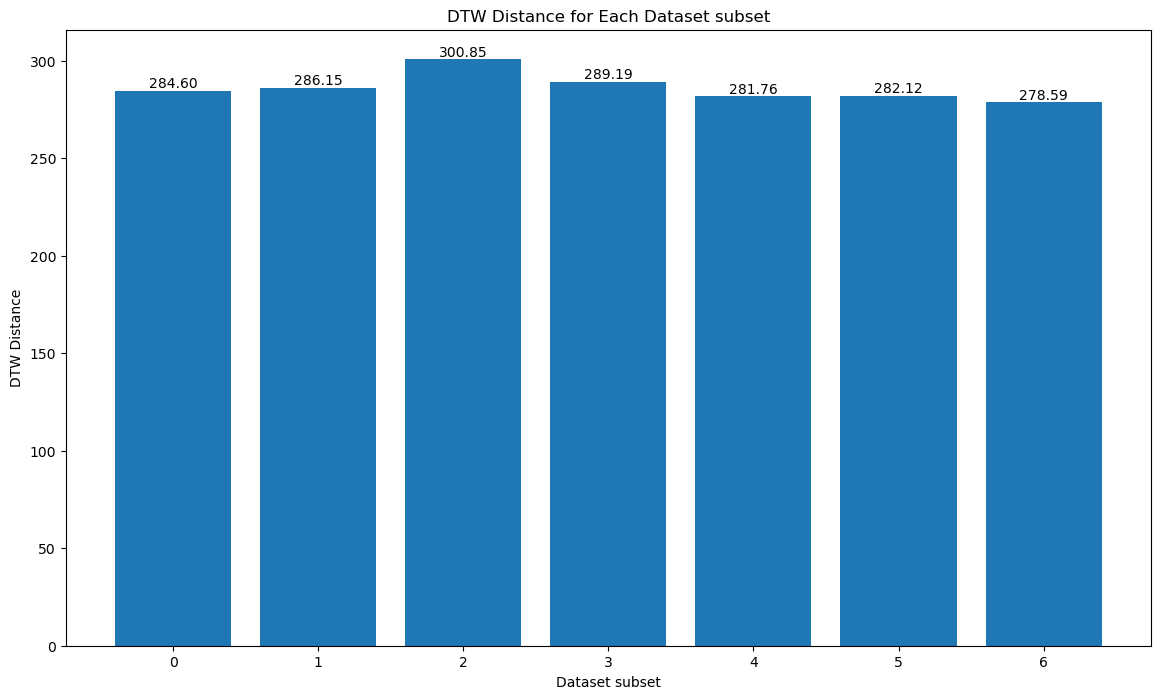

Dataset Index: 6, DTW Distance: 278.5867958501382
Dataset Index: 4, DTW Distance: 281.7641521937719
Dataset Index: 5, DTW Distance: 282.1185587616356
Dataset Index: 0, DTW Distance: 284.5989434486174
Dataset Index: 1, DTW Distance: 286.1531320299659
Dataset Index: 3, DTW Distance: 289.191588019021
Dataset Index: 2, DTW Distance: 300.8508226761262


In [32]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def prepare_data1(train, test, idx):
    # Extract the idx_th elements for the train data array
    first_elements_train = train[:, idx, 0]
    # Create an array of indices for the train data array
    indices_train = np.arange(len(first_elements_train))
    
    # Create a pandas DataFrame for the train data array
    df_train = pd.DataFrame({
        'idx': indices_train,
        'val': first_elements_train
    })
    
    # Extract the first elements for the test data array
    first_elements_test = test[:, idx, 0]
    # Create an array of indices for the test data array, starting after the last index of the train array
    indices_test = np.arange(len(first_elements_test)) + len(first_elements_train)
    
    # Create a pandas DataFrame for the test data array
    df_test = pd.DataFrame({
        'idx': indices_test,
        'val': first_elements_test
    })

    return df_train, df_test

def dtw_distance(series1, series2):
    n, m = len(series1), len(series2)
    dtw_matrix = np.zeros((n+1, m+1))
    
    for i in range(1, n+1):
        dtw_matrix[i, 0] = np.inf
    for j in range(1, m+1):
        dtw_matrix[0, j] = np.inf
    dtw_matrix[0, 0] = 0
    
    for i in range(1, n+1):
        for j in range(1, m+1):
            cost = abs(series1[i-1] - series2[j-1])
            dtw_matrix[i, j] = cost + min(dtw_matrix[i-1, j],    # Insertion
                                          dtw_matrix[i, j-1],    # Deletion
                                          dtw_matrix[i-1, j-1])  # Match
    return dtw_matrix[n, m]

# Load original, fake, and test data
path = "output/test"

with open(f"{path}/stock/new/Stock_train_data_1.pickle", "rb") as fb:
    ori_data = pickle.load(fb)

with open(f"{path}/stock/new/Stock_fake_data_1.pickle", "rb") as fb:
    fake_data = pickle.load(fb)

with open(f"{path}/stock/new/Stock_test_data_1.pickle", "rb") as fb:
    test_data = pickle.load(fb)

# Prepare DataFrames for plotting and calculate DTW distances
dtw_distances = []
for idx in range(7):
    df_original, df_fake = prepare_data1(ori_data,  fake_data, idx)
    _, df_test = prepare_data1(ori_data, test_data, idx)

    # Extract the values
    test_values = df_test['val'].values
    fake_values = df_fake['val'].values

    # Calculate min and max of test and fake data
    min_test, max_test = np.min(test_values), np.max(test_values)
    min_fake, max_fake = np.min(fake_values), np.max(fake_values)

    # Scale fake data to the range of test data
    scaled_fake_values = (fake_values - min_fake) / (max_fake - min_fake) * (max_test - min_test) + min_test

    # Calculate DTW distance
    distance = dtw_distance(test_values, scaled_fake_values)
    dtw_distances.append((idx, distance))

# Sort by DTW distance
dtw_distances.sort(key=lambda x: x[1])

# Plotting DTW distances
plt.figure(figsize=(14, 8))
idxs, distances = zip(*dtw_distances)
bars = plt.bar(idxs, distances)

# Annotating bars with the exact DTW distance values
for bar, distance in zip(bars, distances):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{distance:.2f}', ha='center', va='bottom', fontsize=10)

plt.xlabel('Dataset subset')
plt.ylabel('DTW Distance')
plt.title('DTW Distance for Each Dataset subset')
plt.show()

# Print sorted DTW distances
for idx, distance in dtw_distances:
    print(f"Dataset Index: {idx}, DTW Distance: {distance}")


### Feature nº 2

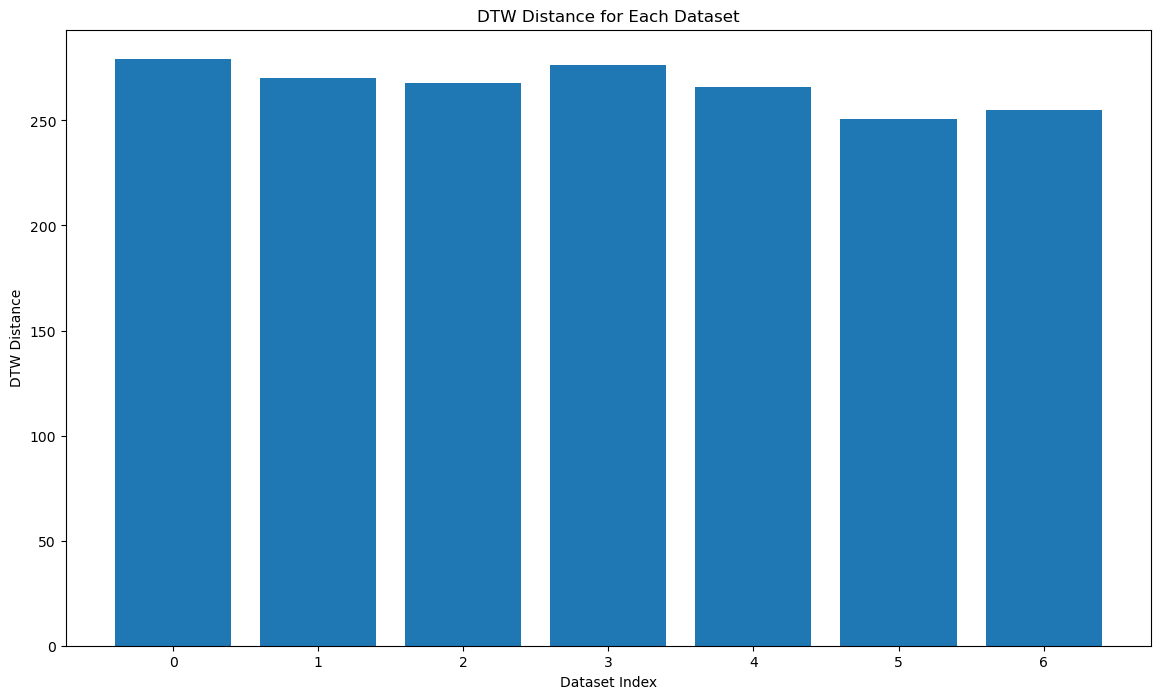

Dataset Index: 5, DTW Distance: 250.48667720157732
Dataset Index: 6, DTW Distance: 255.02114649713482
Dataset Index: 4, DTW Distance: 266.08492654321077
Dataset Index: 2, DTW Distance: 267.8585420646734
Dataset Index: 1, DTW Distance: 270.227952035064
Dataset Index: 3, DTW Distance: 276.4007163831531
Dataset Index: 0, DTW Distance: 279.19517836400826


In [2]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def prepare_data1(train, test, idx):
    # Extract the first elements for the train data array
    first_elements_train = train[:, idx, 1]
    # Create an array of indices for the train data array
    indices_train = np.arange(len(first_elements_train))
    
    # Create a pandas DataFrame for the train data array
    df_train = pd.DataFrame({
        'idx': indices_train,
        'val': first_elements_train
    })
    
    # Extract the first elements for the test data array
    first_elements_test = test[:, idx, 1]
    # Create an array of indices for the test data array, starting after the last index of the train array
    indices_test = np.arange(len(first_elements_test)) + len(first_elements_train)
    
    # Create a pandas DataFrame for the test data array
    df_test = pd.DataFrame({
        'idx': indices_test,
        'val': first_elements_test
    })

    return df_train, df_test

def dtw_distance(series1, series2):
    n, m = len(series1), len(series2)
    dtw_matrix = np.zeros((n+1, m+1))
    
    for i in range(1, n+1):
        dtw_matrix[i, 0] = np.inf
    for j in range(1, m+1):
        dtw_matrix[0, j] = np.inf
    dtw_matrix[0, 0] = 0
    
    for i in range(1, n+1):
        for j in range(1, m+1):
            cost = abs(series1[i-1] - series2[j-1])
            dtw_matrix[i, j] = cost + min(dtw_matrix[i-1, j],    # Insertion
                                          dtw_matrix[i, j-1],    # Deletion
                                          dtw_matrix[i-1, j-1])  # Match
    return dtw_matrix[n, m]

# Load original, fake, and test data
path = "output/test"

with open(f"{path}/stock/new/Stock_train_data_2.pickle", "rb") as fb:
    ori_data = pickle.load(fb)

with open(f"{path}/stock/new/Stock_fake_data_2.pickle", "rb") as fb:
    fake_data = pickle.load(fb)

with open(f"{path}/stock/new/Stock_test_data_2.pickle", "rb") as fb:
    test_data = pickle.load(fb)

# Prepare DataFrames for plotting and calculate DTW distances
dtw_distances = []
for idx in range(7):
    df_original, df_fake = prepare_data1(ori_data, fake_data, idx)
    _, df_test = prepare_data1(ori_data, test_data, idx)

    # Extract the values
    test_values = df_test['val'].values
    fake_values = df_fake['val'].values

    # Calculate min and max of test and fake data
    min_test, max_test = np.min(test_values), np.max(test_values)
    min_fake, max_fake = np.min(fake_values), np.max(fake_values)

    # Scale fake data to the range of test data
    scaled_fake_values = (fake_values - min_fake) / (max_fake - min_fake) * (max_test - min_test) + min_test

    # Calculate DTW distance
    distance = dtw_distance(test_values, scaled_fake_values)
    dtw_distances.append((idx, distance))

# Sort by DTW distance
dtw_distances.sort(key=lambda x: x[1])

# Plotting DTW distances
plt.figure(figsize=(14, 8))
idxs, distances = zip(*dtw_distances)
plt.bar(idxs, distances)
plt.xlabel('Dataset Index')
plt.ylabel('DTW Distance')
plt.title('DTW Distance for Each Dataset')
plt.show()

# Print sorted DTW distances
for idx, distance in dtw_distances:
    print(f"Dataset Index: {idx}, DTW Distance: {distance}")


### Data visualization

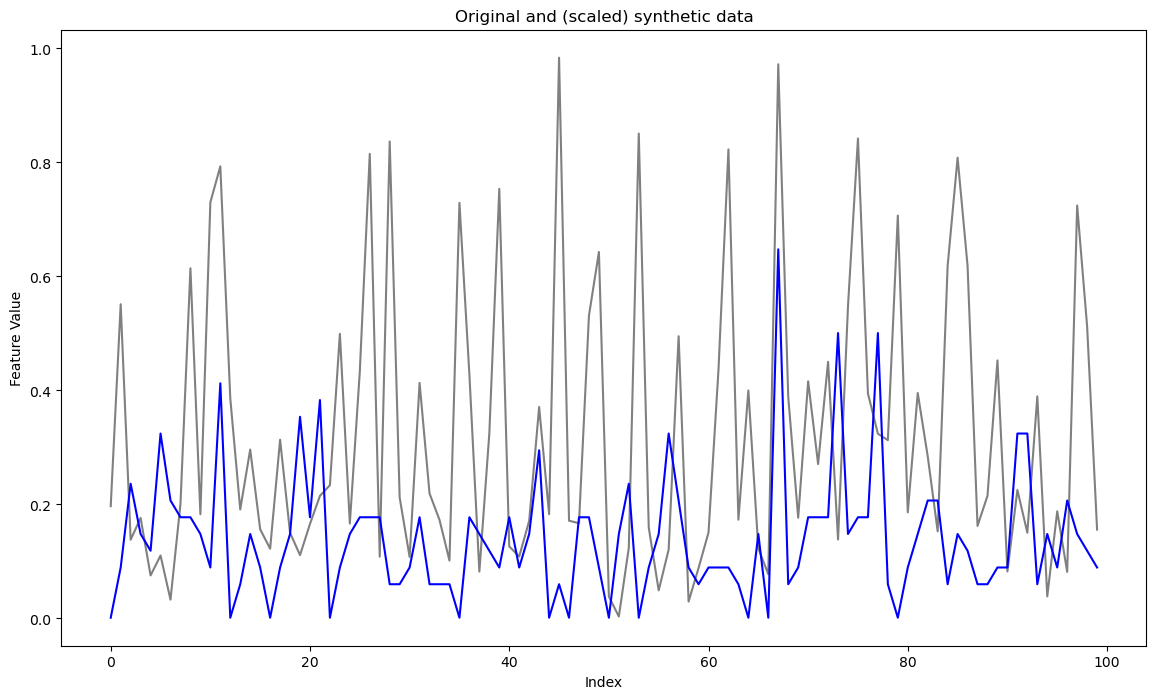

Mean Absolute Error between Original and Synthetic Data:  0.23791283278068662
Length of synthetic data:  1839
Mean value of synthetic data:  0.16085203
Mean value of original data:  0.32586181944134235


In [23]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error

def prepare_data1(train, test):
    # Extract the first elements for the train data array
    first_elements_train = train[:, 0, 0]
    # Create an array of indices for the train data array
    indices_train = np.arange(len(first_elements_train))
    
    # Create a pandas DataFrame for the train data array
    df_train = pd.DataFrame({
        'idx': indices_train,
        'val': first_elements_train
    })
    
    # Extract the first elements for the test data array
    first_elements_test = test[:, 0, 0]
    # Create an array of indices for the test data array, starting after the last index of the train array
    indices_test = np.arange(len(first_elements_test)) + len(first_elements_train)
    
    # Create a pandas DataFrame for the test data array
    df_test = pd.DataFrame({
        'idx': indices_test,
        'val': first_elements_test
    })

    return df_train, df_test

# Load original, fake, and test data
path = "output/test"

with open(f"{path}/stock/new/Stock_train_data_2.pickle", "rb") as fb:
    ori_data = pickle.load(fb)

with open(f"{path}/stock/new/Stock_fake_data_2.pickle", "rb") as fb:
    fake_data = pickle.load(fb)

with open(f"{path}/stock/new/Stock_test_data_2.pickle", "rb") as fb:
    test_data = pickle.load(fb)

# Prepare DataFrames for plotting
df_original, df_fake = prepare_data1(ori_data, fake_data)
_, df_test = prepare_data1(ori_data, test_data)

#df_fake['val'] = df_fake['val'] * df_test['val'].std()/df_fake['val'].std() + df_test['val'].mean()

# Extract the values
test_values = df_test['val'].values
fake_values = df_fake['val'].values

# Calculate min and max of test and fake data
min_test, max_test = np.min(test_values), np.max(test_values)
min_fake, max_fake = np.min(fake_values), np.max(fake_values)

# Scale fake data to the range of test data
scaled_fake_values = (fake_values - min_fake) / (max_fake - min_fake) * (max_test - min_test) + min_test

# Plotting for comparison
plt.figure(figsize=(14, 8))

plt.plot(test_values[-100:], color='gray', label='Test Data')
plt.plot(scaled_fake_values[-100:], color='blue', label='Scaled Fake Data')

plt.xlabel('Index')
plt.ylabel('Feature Value')
plt.title('Original and (scaled) synthetic data')
plt.show()


print("Mean Absolute Error between Original and Synthetic Data: ", mean_absolute_error(df_test['val'], scaled_fake_values))
print("Length of synthetic data: ", len(df_fake['val']))
print("Mean value of synthetic data: ", np.mean(scaled_fake_values))
print("Mean value of original data: ", np.mean(df_original['val']))


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


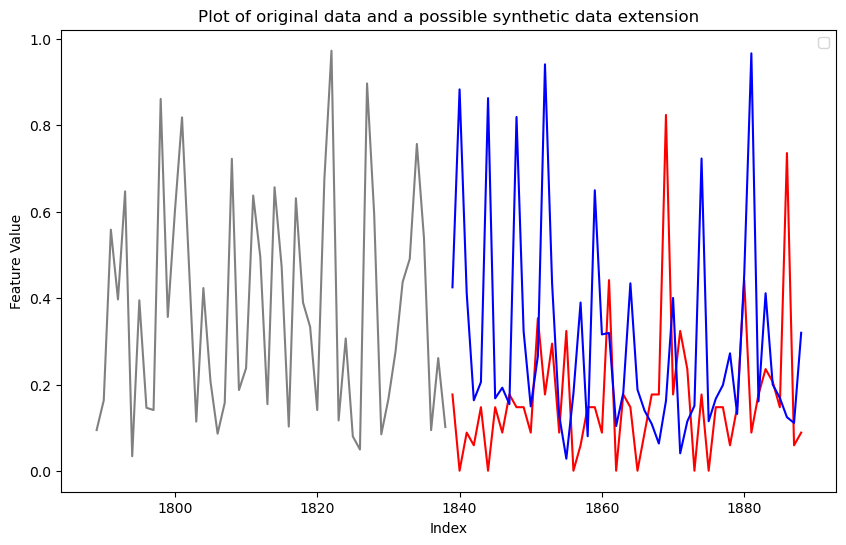

In [26]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def prepare_data1(train, test):
    # Extract the first elements for the train data array
    first_elements_train = train[:, 0, 0]
    # Create an array of indices for the train data array
    indices_train = np.arange(len(first_elements_train))
    
    # Create a pandas DataFrame for the train data array
    df_train = pd.DataFrame({
        'idx': indices_train,
        'val': first_elements_train
    })
    
    # Extract the first elements for the test data array
    first_elements_test = test[:, 0, 0]
    # Create an array of indices for the test data array, starting after the last index of the train array
    indices_test = np.arange(len(first_elements_test)) + len(first_elements_train)
    
    # Create a pandas DataFrame for the test data array
    df_test = pd.DataFrame({
        'idx': indices_test,
        'val': first_elements_test
    })

    return df_train, df_test

# Load original and synthetic data
path = "output/test"

with open(f"{path}/stock/new/Stock_train_data_1.pickle", "rb") as fb:
    ori_data = pickle.load(fb)

with open(f"{path}/stock/new/Stock_fake_data_1.pickle", "rb") as fb:
    fake_data = pickle.load(fb)

with open(f"{path}/stock/new/Stock_test_data_1.pickle", "rb") as fb:
    test_data = pickle.load(fb)

# Prepare DataFrames for plotting
df_original, df_fake = prepare_data1(ori_data, fake_data)
_, df_test = prepare_data1(ori_data, test_data)

#df_fake['val'] = df_fake['val'] * df_test['val'].std()/df_fake['val'].std() + df_test['val'].mean()

# Extract the values
test_values = df_test['val'].values
fake_values = df_fake['val'].values

# Calculate min and max of test and fake data
min_test, max_test = np.min(test_values), np.max(test_values)
min_fake, max_fake = np.min(fake_values), np.max(fake_values)

# Scale fake data to the range of test data
scaled_fake_values = (fake_values - min_fake) / (max_fake - min_fake) * (max_test - min_test) + min_test

# Plotting both graphs
plt.figure(figsize=(10, 6))

# Plot original data in gray
plt.plot(df_original['idx'][-50:], df_original['val'][-50:], color='gray')

# Plot synthetic data in red
plt.plot(df_fake['idx'][:50], scaled_fake_values[:50], color='red')

plt.plot(df_test['idx'][:50], test_values[:50], color='blue')

# Set plot labels and title
plt.xlabel('Index')
plt.ylabel('Feature Value')
plt.title('Plot of original data and a possible synthetic data extension')

# Add legend
plt.legend()

# Show plot
plt.show()



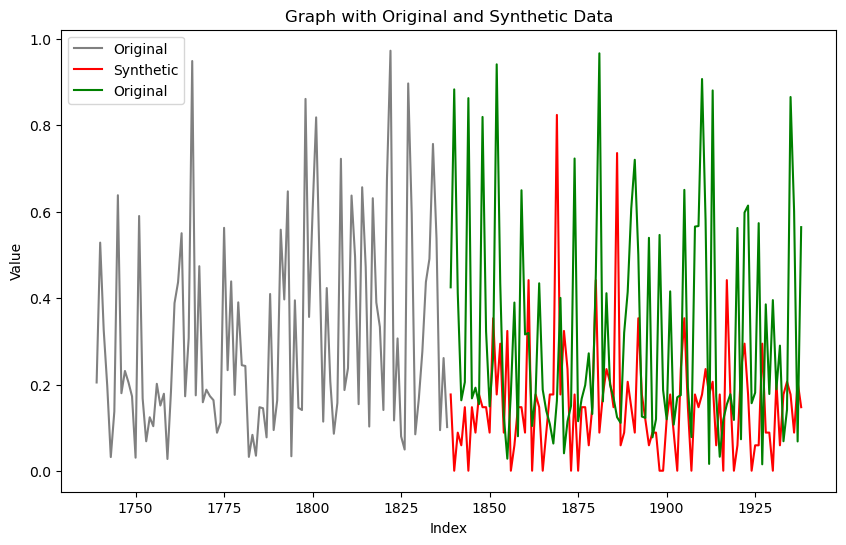

In [16]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def prepare_data(train, test):
    # Extract the first elements and concatenate them for train and test data
    train_values = train[:, 0, 0]
    test_values = test[:, 0, 0]
    
    # Create index arrays for the combined data
    indices_train = np.arange(len(train_values))
    indices_test = np.arange(len(test_values)) + len(indices_train)
    
    # Create DataFrames
    df_train = pd.DataFrame({'idx': indices_train, 'val': train_values})
    df_test = pd.DataFrame({'idx': indices_test, 'val': test_values})
    
    return df_train, df_test

# Load original and synthetic data
path = "output/test"

with open(f"{path}/stock/new/Stock_train_data_1.pickle", "rb") as fb:
    ori_data = pickle.load(fb)

with open(f"{path}/stock/new/Stock_fake_data_1.pickle", "rb") as fb:
    fake_data = pickle.load(fb)

with open(f"{path}/stock/new/Stock_test_data_1.pickle", "rb") as fb:
    test_data = pickle.load(fb)

# Prepare DataFrames for plotting
df_original, df_fake = prepare_data(ori_data, fake_data)
_, df_test = prepare_data(ori_data, test_data)

# Extract the values
test_values = df_test['val'].values
fake_values = df_fake['val'].values

# Calculate min and max of test and fake data
min_test, max_test = np.min(test_values), np.max(test_values)
min_fake, max_fake = np.min(fake_values), np.max(fake_values)

# Scale fake data to the range of test data
scaled_fake_values = (fake_values - min_fake) / (max_fake - min_fake) * (max_test - min_test) + min_test

# Adjust the indices to ensure they are continuous without large gaps
df_fake['idx'] = df_original['idx'].max() + 1 + df_fake.index
df_test['idx'] = df_original['idx'].max() + 1 + df_test.index

# Plot all data in a single continuous line
plt.figure(figsize=(10, 6))

# Plot original data in gray
plt.plot(df_original['idx'][-100:], df_original['val'][-100:], color='gray', label='Original')

# Plot synthetic data in red
plt.plot(df_fake['idx'][:100], scaled_fake_values[:100], color='red', label='Synthetic')

plt.plot(df_test['idx'][:100], test_values[:100], color='green', label='Original')

# Set plot labels and title
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Graph with Original and Synthetic Data')

# Add legend
plt.legend()

# Show plot
plt.show()


### Confidence Interval visualization

#### Original data

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=1.74 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2951.347, Time=0.09 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1496.480, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=2173.671, Time=0.12 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=1055.498, Time=0.09 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=838.343, Time=0.25 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=685.320, Time=0.34 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=592.335, Time=0.27 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=inf, Time=2.05 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=inf, Time=1.80 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=139.206, Time=0.60 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=137.263, Time=0.46 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=135.620, Time=0.43 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=133.954, Time=0.20 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=132.158, Time

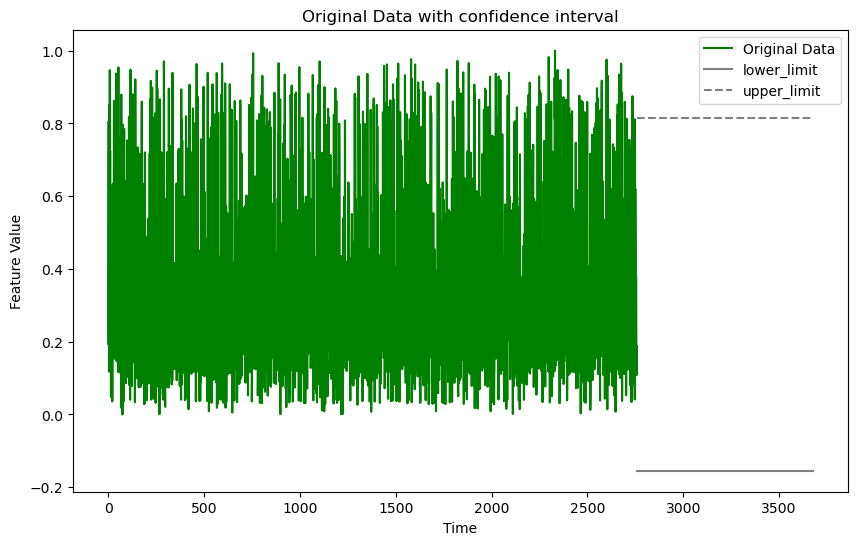

In [15]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima

def prepare_data1(train, test):
    # Extract the first elements for the train data array
    first_elements_train = train[:, 0, 0]
    # Create an array of indices for the train data array
    indices_train = np.arange(len(first_elements_train))
    
    # Create a pandas DataFrame for the train data array
    df_train = pd.DataFrame({
        'idx': indices_train,
        'val': first_elements_train
    })
    
    # Extract the first elements for the test data array
    first_elements_test = test[:, 0, 0]
    # Create an array of indices for the test data array, starting after the last index of the train array
    indices_test = np.arange(len(first_elements_test)) + len(first_elements_train)
    
    # Create a pandas DataFrame for the test data array
    df_test = pd.DataFrame({
        'idx': indices_test,
        'val': first_elements_test
    })

    return df_train, df_test

# Load original and synthetic data
path = "output/test"

with open(f"{path}/stock/new/Stock_train_data_2.pickle", "rb") as fb:
    ori_data = pickle.load(fb)

with open(f"{path}/stock/new/Stock_fake_data_2.pickle", "rb") as fb:
    fake_data = pickle.load(fb)

with open(f"{path}/stock/new/Stock_test_data_2.pickle", "rb") as fb:
    test_data = pickle.load(fb)

# Prepare DataFrames for plotting
df_original, df_test = prepare_data1(ori_data, test_data)

# Extract the values
test_values = df_test['val'].values[:len(df_test)//2]  # Use half of the test values
original_values = df_original['val'].values

# Concatenate original and test values
all_values1 = np.concatenate([original_values, test_values])

# Fit ARIMA model using auto_arima
arima_model = auto_arima(all_values1, seasonal=False, trace=True)
model = ARIMA(all_values1, order=arima_model.order)  
model_fit = model.fit()

# Forecast
forecast_steps = len(df_test)//2
forecast1 = model_fit.get_forecast(steps=forecast_steps)
mean_forecast = forecast1.predicted_mean
conf_int1 = forecast1.conf_int(alpha=0.05)  # 80% confidence interval

# Plotting the forecast with the confidence interval
plt.figure(figsize=(10, 6))

# Plot the original values
plt.plot(all_values1, label='Original Data', color='green')

# Plot the forecasted values
forecast_index = np.arange(len(all_values1), len(all_values1) + forecast_steps)
#plt.plot(forecast_index, mean_forecast, label='Forecast', color='red')


plt.plot(forecast_index, conf_int1[:,0], label='lower_limit', color='grey')
plt.plot(forecast_index, conf_int1[:,1], label='upper_limit', color='grey', linestyle='--')



plt.title('Original Data with confidence interval')
plt.xlabel('Time')
plt.ylabel('Feature Value')
plt.legend()
plt.show()

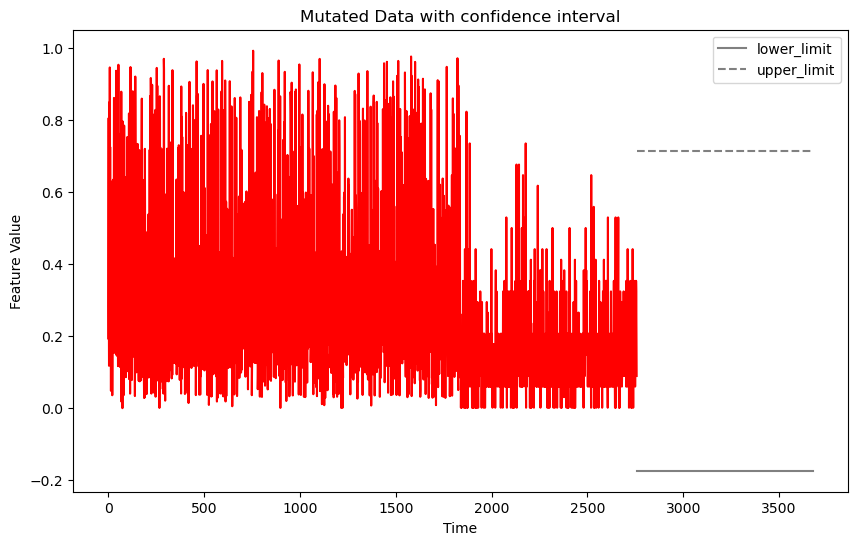

In [13]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima

def prepare_data1(train, test):
    # Extract the first elements for the train data array
    first_elements_train = train[:, 0, 0]
    # Create an array of indices for the train data array
    indices_train = np.arange(len(first_elements_train))
    
    # Create a pandas DataFrame for the train data array
    df_train = pd.DataFrame({
        'idx': indices_train,
        'val': first_elements_train
    })
    
    # Extract the first elements for the test data array
    first_elements_test = test[:, 0, 0]
    # Create an array of indices for the test data array, starting after the last index of the train array
    indices_test = np.arange(len(first_elements_test)) + len(first_elements_train)
    
    # Create a pandas DataFrame for the test data array
    df_test = pd.DataFrame({
        'idx': indices_test,
        'val': first_elements_test
    })

    return df_train, df_test

# Load original and synthetic data
path = "output/test"

with open(f"{path}/stock/new/Stock_train_data_2.pickle", "rb") as fb:
    ori_data = pickle.load(fb)

with open(f"{path}/stock/new/Stock_fake_data_2.pickle", "rb") as fb:
    fake_data = pickle.load(fb)

with open(f"{path}/stock/new/Stock_test_data_2.pickle", "rb") as fb:
    test_data = pickle.load(fb)

# Prepare DataFrames for plotting
df_original, df_fake = prepare_data1(ori_data, fake_data)
_, df_test = prepare_data1(ori_data, test_data)

#df_fake['val'] = df_fake['val'] * df_test['val'].std()/df_fake['val'].std() + df_test['val'].mean()

# Extract the values
test_values = df_test['val'].values
fake_values = df_fake['val'].values

# Calculate min and max of test and fake data
min_test, max_test = np.min(test_values), np.max(test_values)
min_fake, max_fake = np.min(fake_values), np.max(fake_values)

# Scale fake data to the range of test data
scaled_fake_values = (fake_values - min_fake) / (max_fake - min_fake) * (max_test - min_test) + min_test
# Concatenate original and test values
all_values2 = np.concatenate([original_values, scaled_fake_values[:len(df_test)//2]])

model = ARIMA(all_values2, order=arima_model.order)  
model_fit = model.fit()

# Forecast
forecast_steps = len(df_test)//2
forecast1 = model_fit.get_forecast(steps=forecast_steps)
mean_forecast = forecast1.predicted_mean
conf_int2 = forecast1.conf_int(alpha=0.05)  # 80% confidence interval

# Plotting the forecast with the confidence interval
plt.figure(figsize=(10, 6))

# Plot the original values
plt.plot(all_values2, color='red')

# Plot the forecasted values
forecast_index = np.arange(len(all_values2), len(all_values2) + forecast_steps)
#plt.plot(forecast_index, mean_forecast, label='Forecast', color='red')


plt.plot(forecast_index, conf_int2[:,0], label='lower_limit', color='grey')
plt.plot(forecast_index, conf_int2[:,1], label='upper_limit', color='grey', linestyle='--')



plt.title('Mutated Data with confidence interval')
plt.xlabel('Time')
plt.ylabel('Feature Value')
plt.legend()
plt.show()

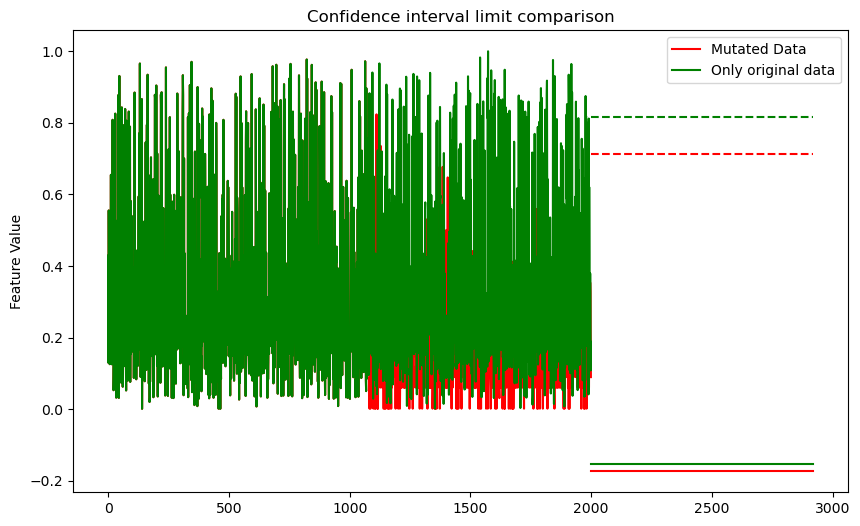

In [28]:
# Plotting the forecast with the confidence interval
plt.figure(figsize=(10, 6))

# Plot the original values
plt.plot(all_values2[-2000:], label='Mutated Data', color='red')
plt.plot(all_values1[-2000:], label='Only original data', color='green')

#forecast_index = np.arange(len(all_values1), len(all_values1) + 100)
#forecast_index = np.arange(0, 10)

forecast_index = np.arange(len(all_values2[-2000:]), len(all_values2[-2000:]) + forecast_steps)

plt.plot(forecast_index, conf_int1[:,0], color='green')
plt.plot(forecast_index, conf_int1[:,1], color='green', linestyle='--')

plt.plot(forecast_index, conf_int2[:,0], color='red')
plt.plot(forecast_index, conf_int2[:,1], color='red', linestyle='--')

plt.title('Confidence interval limit comparison')
plt.ylabel('Feature Value')
plt.legend()
plt.show()

## ACIW visualization

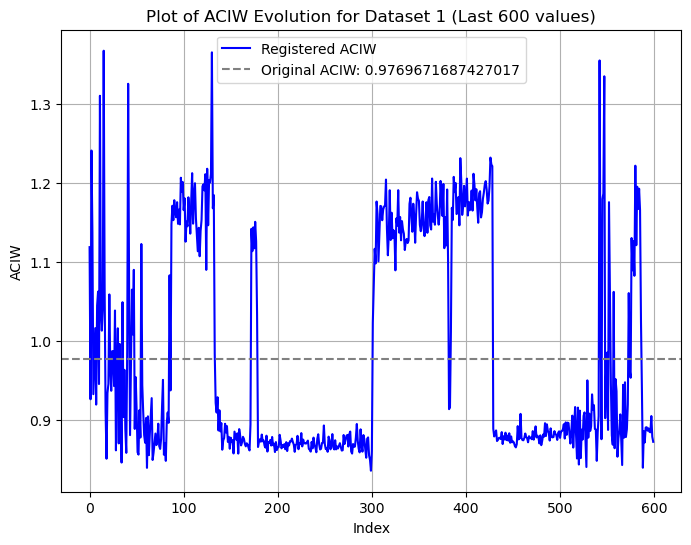

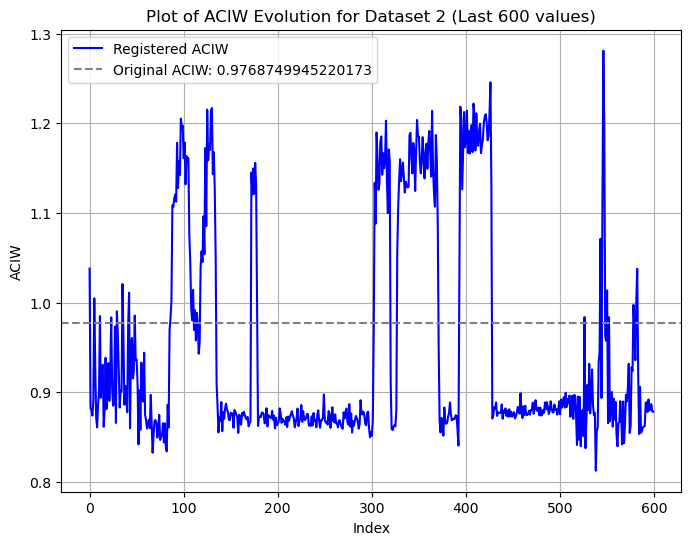

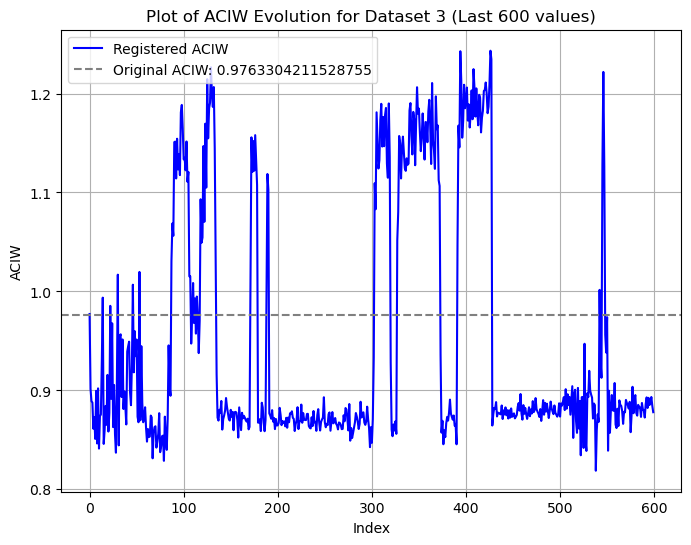

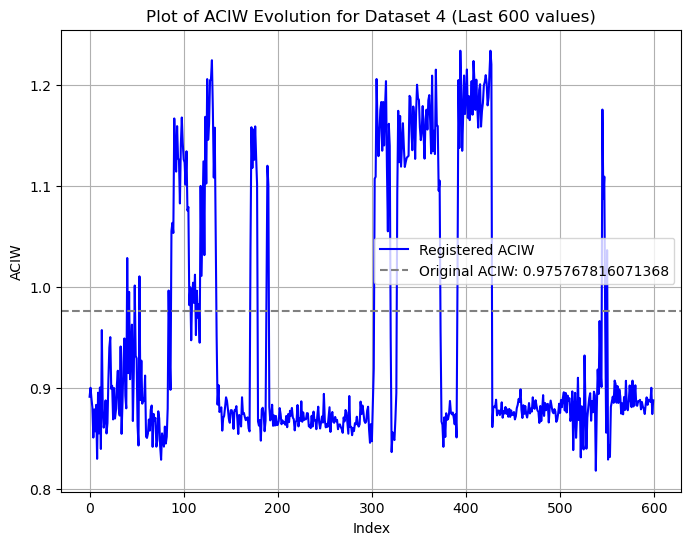

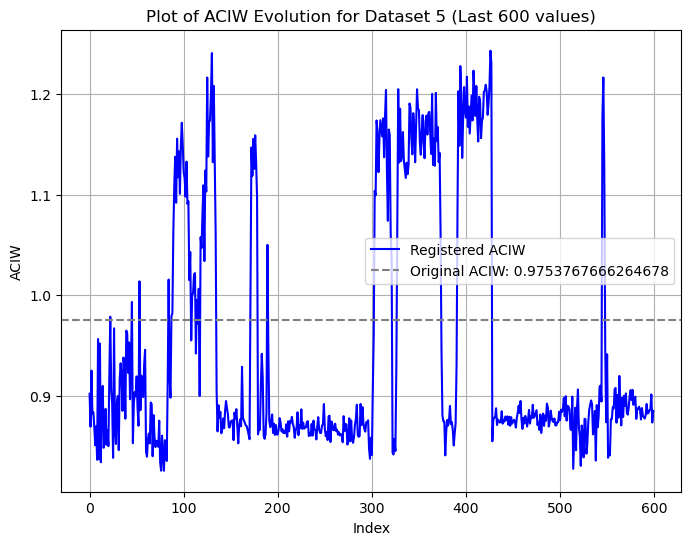

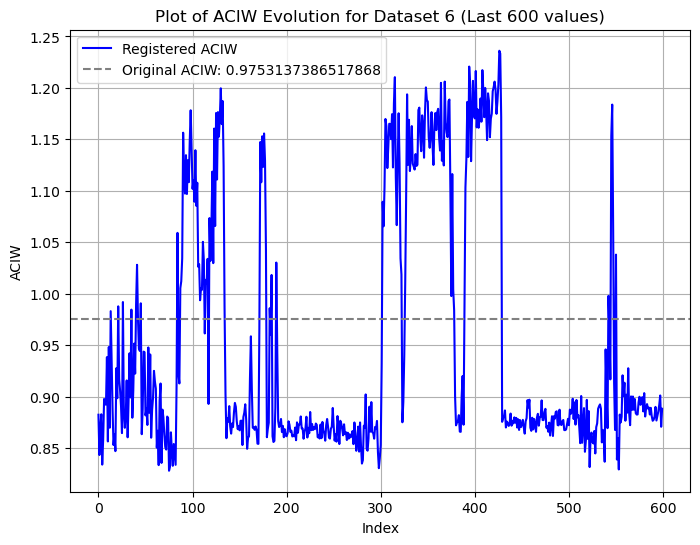

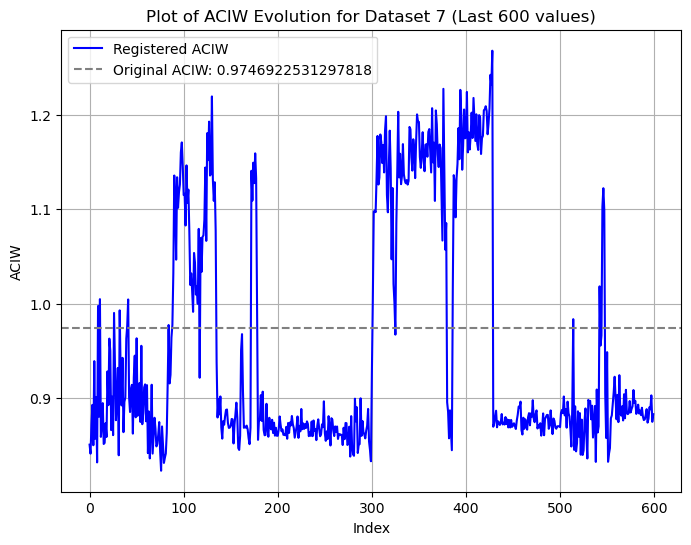

Maximal value of the original ACIW:  1.2680983882492927


In [2]:
import pickle
import matplotlib.pyplot as plt

path = "output/test"

# Load the list of values from the pickle files
with open(f"{path}/stock/new/Stock_ACIW_lst_PT10_A1_ARIMA_2.pickle", 'rb') as f:
    aciw_lst = pickle.load(f)

with open(f"{path}/stock/new/Stock_ARIMA_ACIW_O_lst_2.pickle", 'rb') as f:
    aciw_o_lst = pickle.load(f)

# Check if the loaded data are lists
if not isinstance(aciw_lst, list) or not isinstance(aciw_o_lst, list):
    raise ValueError("Loaded data must be lists")

# Ensure aciw_o_lst has 7 values and aciw_lst has 6000 sublists of 7 elements each
assert len(aciw_o_lst) == 7, "aciw_o_lst must contain 7 values"
assert all(len(sublist) == 7 for sublist in aciw_lst), "Each sublist in aciw_lst must contain 7 elements"

# Number of values to display
num_values = 600

# Iterate over each dataset (each column in aciw_lst) and plot the results
for idx in range(7):
    dataset_values = [sublist[idx] for sublist in aciw_lst]
    original_value = aciw_o_lst[idx]
    
    # Slice to get the last 100 values
    if len(dataset_values) > num_values:
        dataset_values = dataset_values[-num_values:]
    
    plt.figure(figsize=(8, 6))  # Set the figure size (optional)
    
    plt.plot(dataset_values, linestyle='-', color='b', label='Registered ACIW')  # Plot the values
    plt.axhline(y=original_value, color='gray', linestyle='--', label=f'Original ACIW: {original_value}')  # Add horizontal line
    
    plt.title(f'Plot of ACIW Evolution for Dataset {idx+1} (Last {num_values} values)')  # Set plot title
    plt.xlabel('Index')  # Set x-axis label (optional)
    plt.ylabel('ACIW')  # Set y-axis label (optional)
    plt.grid(True)  # Show grid (optional)
    plt.legend()  # Show legend
    
    plt.show()  # Display the plot


print("Maximal value of the original ACIW: ", max(dataset_values))


# ___________________________________________________________

# Testing visualization

## 1st) raw data

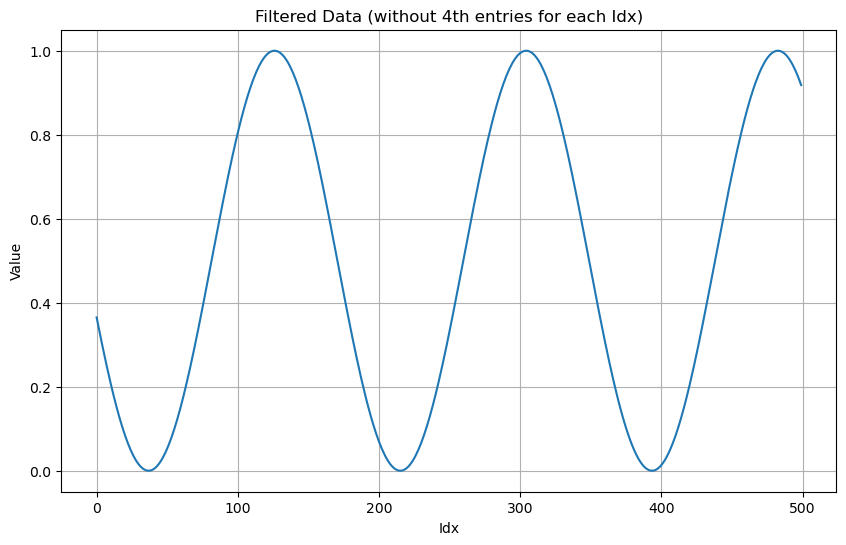

In [61]:
import pandas as pd  
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'data/sine_wave_data_formatted_min_max_waves.csv'  # Update this path to your actual file location
data = pd.read_csv(file_path)

# Function to get the nth 'Value' entry for each unique 'Idx'
def get_nth_value(data, n):
    nth_values = data.groupby('Idx').nth(n-1).reset_index()  # nth is zero-based index
    return nth_values

# Set the desired nth entry (for example, 4 for every fourth entry)
n = 4

# Get the nth values
nth_values = get_nth_value(data, n)


# Plotting (optional, for verification)
plt.figure(figsize=(10, 6))
plt.plot(nth_values['Idx'], nth_values['Value'], linestyle='-')
plt.xlabel('Idx')
plt.ylabel('Value')
plt.title('Filtered Data (without 4th entries for each Idx)')
plt.grid(True)
plt.show()


In [63]:
import numpy as np
import pandas as pd

def sine_data_generation(no, seq_len, dim, min_waves=5, max_waves=10):
    """Sine data generation with varying frequencies ensuring a minimum and maximum number of complete waves.
    
    Args:
        - no: the number of samples
        - seq_len: sequence length of the time-series
        - dim: feature dimensions
        - min_waves: minimum number of complete sine waves per sequence
        - max_waves: maximum number of complete sine waves per sequence
        
    Returns:
        - data: generated data
    """  
    data = list()

    # Calculate the frequency range to achieve between min_waves and max_waves
    f_min = min_waves / seq_len
    f_max = max_waves / seq_len

    for i in range(no):      
        temp = list()
        for k in range(dim):
            freq = np.random.uniform(f_min, f_max)            
            phase = np.random.uniform(0, np.pi * 2)
            temp_data = [np.sin(freq * j + phase) for j in range(seq_len)] 
            temp.append(temp_data)
        
        temp = np.transpose(np.asarray(temp))        
        temp = (temp + 1) * 0.5
        data.append(temp)
                
    return data

# Example usage:
no = 10  # number of samples (datasets)
seq_len = 500  # sequence length (time points)
dim = 1  # feature dimensions
min_waves = 15  # minimum number of complete waves
max_waves = 30  # maximum number of complete waves

data = sine_data_generation(no, seq_len, dim, min_waves, max_waves)

# Prepare the data for the CSV
csv_data = []

for idx in range(seq_len):
    for dataset_idx, sample in enumerate(data):
        csv_data.append([dataset_idx, idx, sample[idx][0]])

# Convert the list to a DataFrame
df = pd.DataFrame(csv_data, columns=['Dataset', 'Idx', 'sin_val'])

# Save the DataFrame to a CSV file without the 'Dataset' column header
csv_file_path = 'data/sine_wave_data_formatted_min_max_waves1.csv'
df.to_csv(csv_file_path, index=False, header=False)

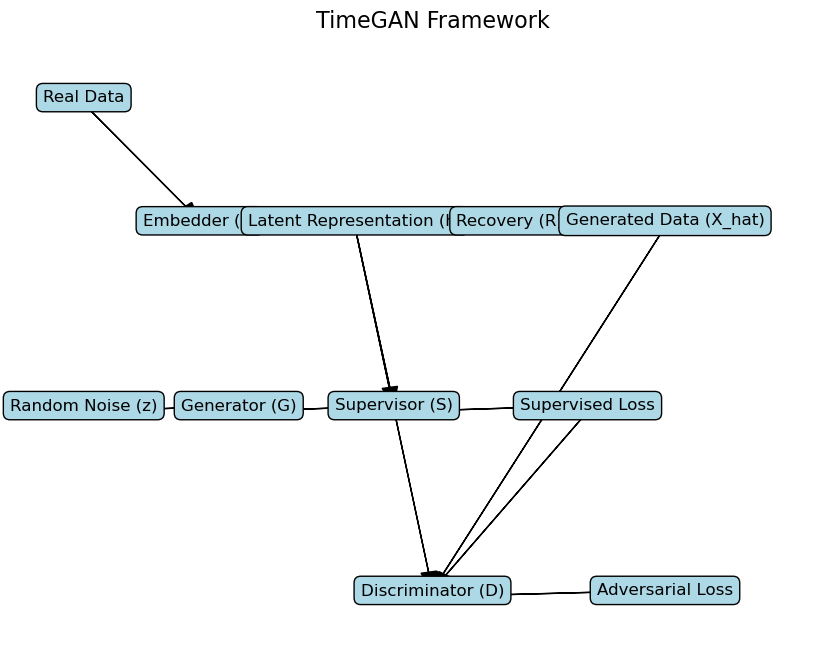

In [49]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Components' Positions
components = {
    'Real Data': (0.5, 9),
    'Embedder (E)': (2, 7),
    'Latent Representation (h)': (4, 7),
    'Recovery (R)': (6, 7),
    'Generated Data (X_hat)': (8, 7),
    'Random Noise (z)': (0.5, 4),
    'Generator (G)': (2.5, 4),
    'Supervisor (S)': (4.5, 4),
    'Supervised Loss': (7, 4),
    'Discriminator (D)': (5, 1),
    'Adversarial Loss': (8, 1)
}

# Draw arrows between components
arrows = [
    ('Real Data', 'Embedder (E)'),
    ('Embedder (E)', 'Latent Representation (h)'),
    ('Latent Representation (h)', 'Recovery (R)'),
    ('Recovery (R)', 'Generated Data (X_hat)'),
    ('Latent Representation (h)', 'Supervisor (S)'),
    ('Random Noise (z)', 'Generator (G)'),
    ('Generator (G)', 'Supervisor (S)'),
    ('Supervisor (S)', 'Supervised Loss'),
    ('Latent Representation (h)', 'Discriminator (D)'),
    ('Generated Data (X_hat)', 'Discriminator (D)'),
    ('Supervised Loss', 'Discriminator (D)'),
    ('Discriminator (D)', 'Adversarial Loss')
]

# Draw boxes for components
for component, (x, y) in components.items():
    ax.text(x, y, component, ha='center', va='center', fontsize=12,
            bbox=dict(boxstyle="round,pad=0.4", edgecolor="black", facecolor="lightblue"))

# Draw arrows
for start, end in arrows:
    sx, sy = components[start]
    ex, ey = components[end]
    ax.arrow(sx, sy-0.1, ex-sx, ey-sy+0.1, head_width=0.2, head_length=0.3, fc='black', ec='black', length_includes_head=True)

# Set axis limits and labels
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.axis('off')
plt.title("TimeGAN Framework", fontsize=16)

# Display the graph
plt.show()

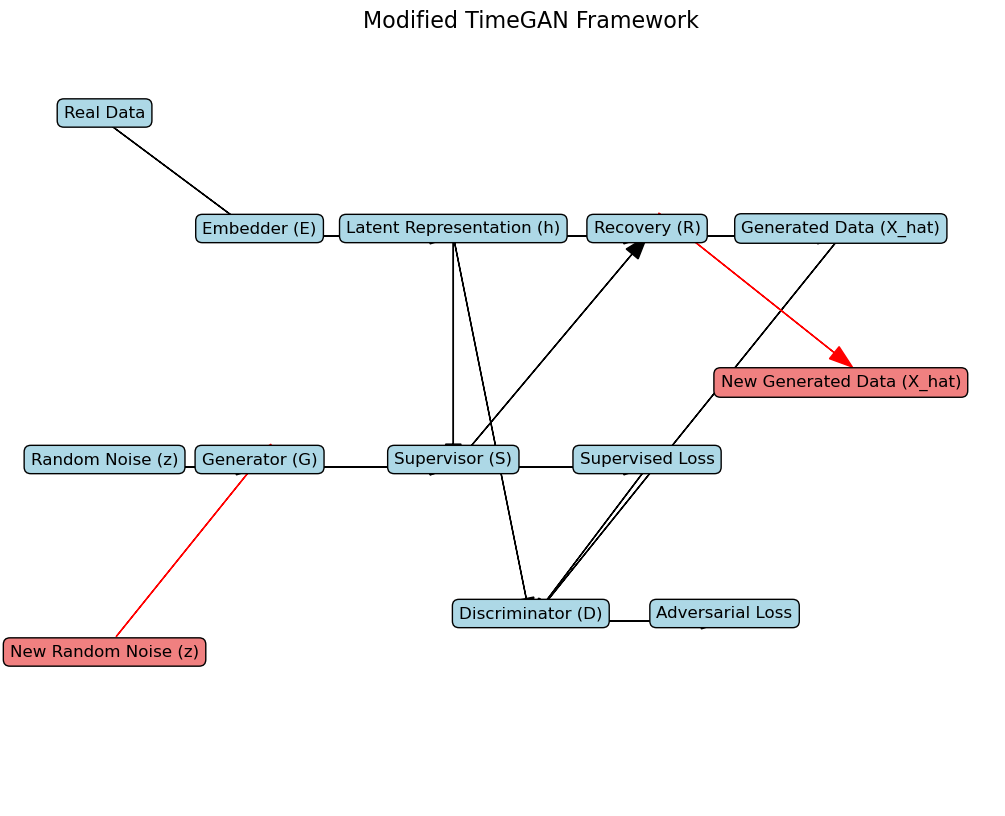

In [54]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Create the figure and axis
fig, ax = plt.subplots(figsize=(12, 10))

# Components' Positions with more spacing
components = {
    'Real Data': (0.5, 9),
    'Embedder (E)': (2.5, 7.5),
    'Latent Representation (h)': (5, 7.5),
    'Recovery (R)': (7.5, 7.5),
    'Generated Data (X_hat)': (10, 7.5),
    'Random Noise (z)': (0.5, 4.5),
    'Generator (G)': (2.5, 4.5),
    'Supervisor (S)': (5, 4.5),
    'Supervised Loss': (7.5, 4.5),
    'Discriminator (D)': (6, 2.5),
    'Adversarial Loss': (8.5, 2.5),
    # New components
    'New Random Noise (z)': (0.5, 2),  # New Random Noise position
    'New Generated Data (X_hat)': (10, 5.5)  # Adjusted the position of the new Generated Data to avoid overlap
}

# Draw arrows between components, including the new flow
arrows = [
    ('Real Data', 'Embedder (E)'),
    ('Embedder (E)', 'Latent Representation (h)'),
    ('Latent Representation (h)', 'Recovery (R)'),
    ('Recovery (R)', 'Generated Data (X_hat)'),
    ('Latent Representation (h)', 'Supervisor (S)'),
    ('Random Noise (z)', 'Generator (G)'),
    ('Generator (G)', 'Supervisor (S)'),
    ('Supervisor (S)', 'Supervised Loss'),
    ('Latent Representation (h)', 'Discriminator (D)'),
    ('Generated Data (X_hat)', 'Discriminator (D)'),
    ('Supervised Loss', 'Discriminator (D)'),
    ('Discriminator (D)', 'Adversarial Loss'),
    # New flow with different color and non-overlapping arrows
    ('New Random Noise (z)', 'Generator (G)'),
    ('Generator (G)', 'Supervisor (S)'),
    ('Supervisor (S)', 'Recovery (R)'),
    ('Recovery (R)', 'New Generated Data (X_hat)')
]

# Draw boxes for components with color distinction for new ones
for component, (x, y) in components.items():
    color = "lightcoral" if "New" in component else "lightblue"
    ax.text(x, y, component, ha='center', va='center', fontsize=12,
            bbox=dict(boxstyle="round,pad=0.4", edgecolor="black", facecolor=color))

# Draw arrows with red color for the new flow
for start, end in arrows:
    sx, sy = components[start]
    ex, ey = components[end]
    color = 'red' if "New" in start or "New" in end else 'black'
    # Adjusting the offset to avoid overlap for the new flow
    y_offset = 0.2 if "New" in start or "New" in end else -0.1
    x_offset = 0.15 if "New" in start or "New" in end else 0
    ax.arrow(sx + x_offset, sy + y_offset, ex - sx, ey - sy, head_width=0.2, head_length=0.3,
             fc=color, ec=color, length_includes_head=True)

# Set axis limits and labels
ax.set_xlim(0, 12)
ax.set_ylim(0, 10)
ax.axis('off')
plt.title("Modified TimeGAN Framework", fontsize=16)

# Display the graph
plt.show()


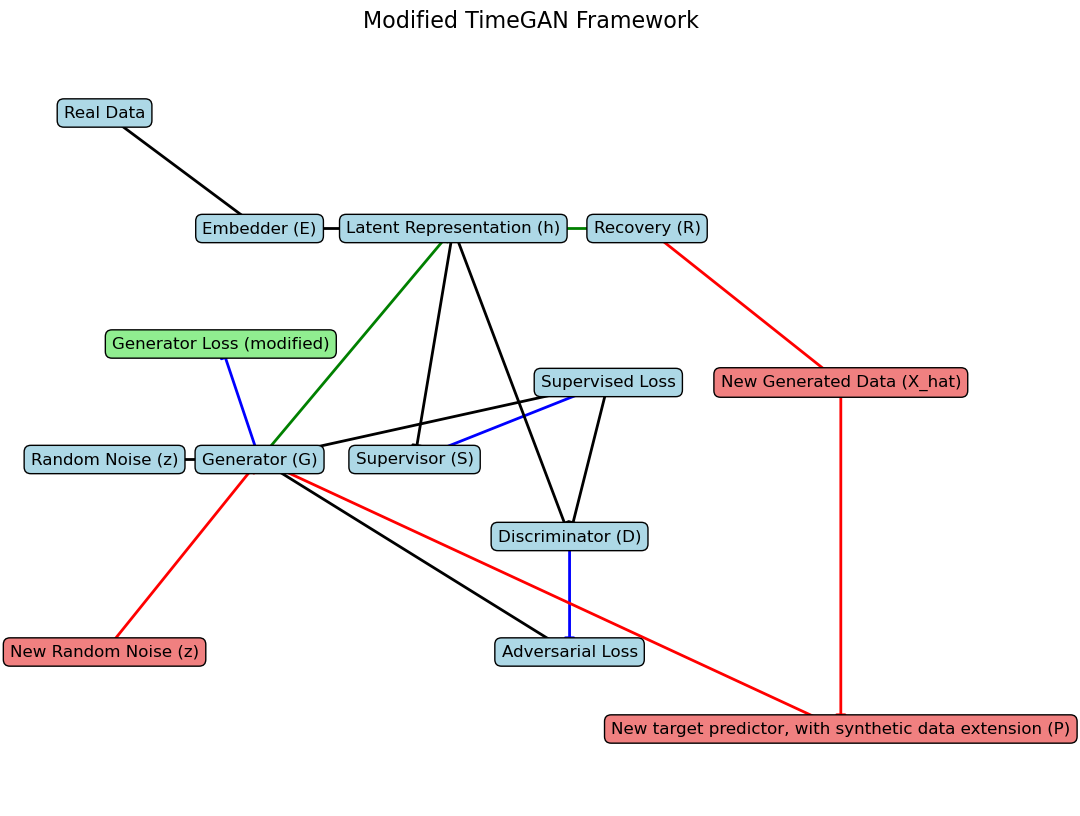

In [34]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Create the figure and axis
fig, ax = plt.subplots(figsize=(12, 10))

# Components' Positions with more spacing
components = {
    'Real Data': (0.5, 9),
    'Embedder (E)': (2.5, 7.5),
    'Latent Representation (h)': (5, 7.5),
    'Recovery (R)': (7.5, 7.5),
    'Random Noise (z)': (0.5, 4.5),
    'Generator (G)': (2.5, 4.5),
    'Supervisor (S)': (4.5, 4.5),
    'Supervised Loss': (7, 5.5),
    'Discriminator (D)': (6.5, 3.5),
    'Adversarial Loss': (6.5, 2),
    'Generator Loss (modified)': (2, 6),
    # New components
    'New Random Noise (z)': (0.5, 2),  # New Random Noise position
    'New Generated Data (X_hat)': (10, 5.5),  # Adjusted the position of the new Generated Data to avoid overlap
    'New target predictor, with synthetic data extension (P)' : (10, 1)}

# Draw arrows between components, including the new flow
arrows = [
    ('Real Data', 'Embedder (E)'),
    ('Embedder (E)', 'Latent Representation (h)'),
    ('Latent Representation (h)', 'Recovery (R)'),
    ('Latent Representation (h)', 'Supervisor (S)'),
    ('Random Noise (z)', 'Generator (G)'),
    ('Generator (G)', 'Latent Representation (h)'),
    ('Supervisor (S)', 'Supervised Loss'),
    ('Latent Representation (h)', 'Discriminator (D)'),
    ('Supervised Loss', 'Discriminator (D)'),
    ('Discriminator (D)', 'Adversarial Loss'),
    ('Adversarial Loss', 'Generator (G)'),
    ('Supervised Loss', 'Generator (G)'),
    # New flow with different color and non-overlapping arrows
    ('New Random Noise (z)', 'Generator (G)'),
    ('Recovery (R)', 'New Generated Data (X_hat)'),
    ('New Generated Data (X_hat)', 'New target predictor, with synthetic data extension (P)'),
    ('New target predictor, with synthetic data extension (P)', 'Generator (G)'),
    ('Generator (G)', 'Generator Loss (modified)')
]

# Draw boxes for components with color distinction for new ones
for component, (x, y) in components.items():
    color = "lightcoral" if "New" in component else "lightgreen" if "modified" in component else "lightblue"
    ax.text(x, y, component, ha='center', va='center', fontsize=12,
            bbox=dict(boxstyle="round,pad=0.4", edgecolor="black", facecolor=color))

# Draw arrows using FancyArrowPatch
for start, end in arrows:
    sx, sy = components[start]
    ex, ey = components[end]
    color = 'red' if "New" in start or "New" in end else "green" if "h" in end and "G" in start or "h" in start and "R" in end else 'blue' if 'Loss' in end else 'black'
    arrow = patches.FancyArrowPatch((sx, sy), (ex, ey), color=color, arrowstyle='-|>', mutation_scale=15, lw=2)
    ax.add_patch(arrow)

# Set axis limits and labels
ax.set_xlim(0, 12)
ax.set_ylim(0, 10)
ax.axis('off')
plt.title("Modified TimeGAN Framework", fontsize=16)

# Display the graph
plt.show()
